# Clustering

# KMeans

K-Means Clustering es un algoritmo de aprendizaje no supervisado. 

Algunas aplicaciones incluyen:

* Perfilamiento de clientes
* Segmentación de mercado
* Computer vision


## Como funciona

1. Seleccione K puntos aleatorios como centro de los clusters, a estos grupos se les conoce como centroides

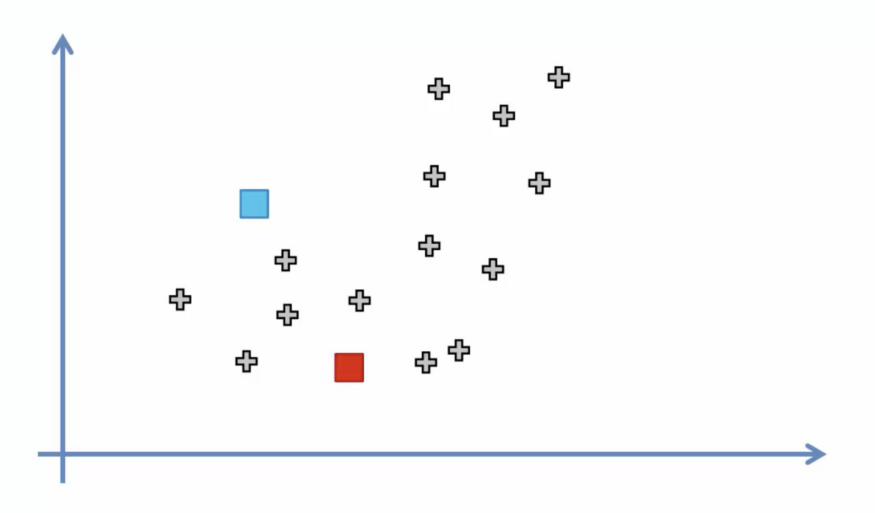

2. Asigne cada observación al cluster más cercano al calcular su distancia respecto al centroide 

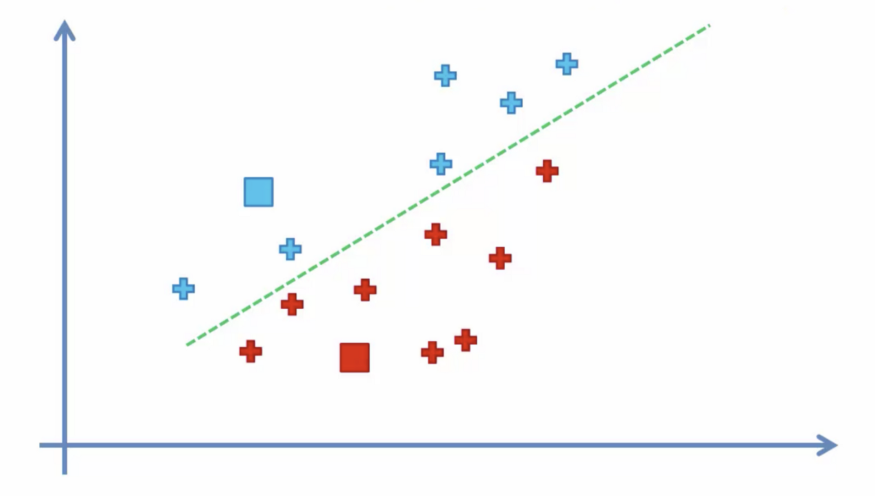

3. Determine el nuevo centro del cluster al calcular la media de los puntos asignados

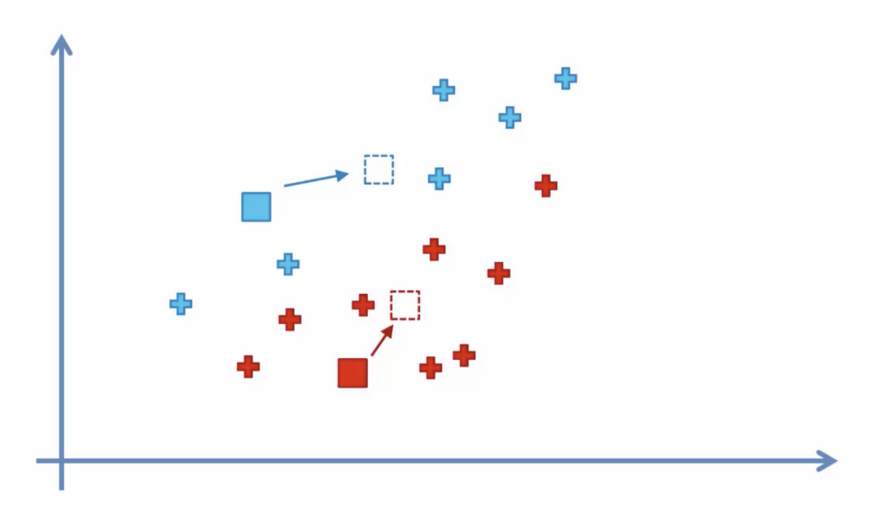

4. Repita los pasos 2 y 3 hasta que ningún punto sea reasignado

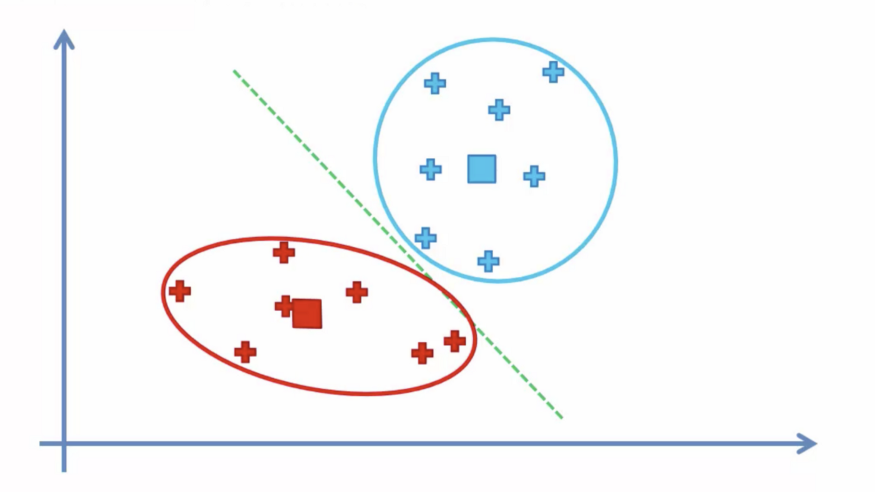

## Escogiendo el número adecuado de Grupos

WCSS  es definido comola suma de las distancias al cuadrado de cada miembro y su centroide

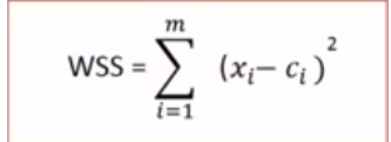

Graficamos la relación entre el número de clusters y la Suma de cuadrados dentro del cluster (WCSS), luego seleccionamos el número de clusters donde el cambio en WCSS comienza a estabilizarse (método del codo)

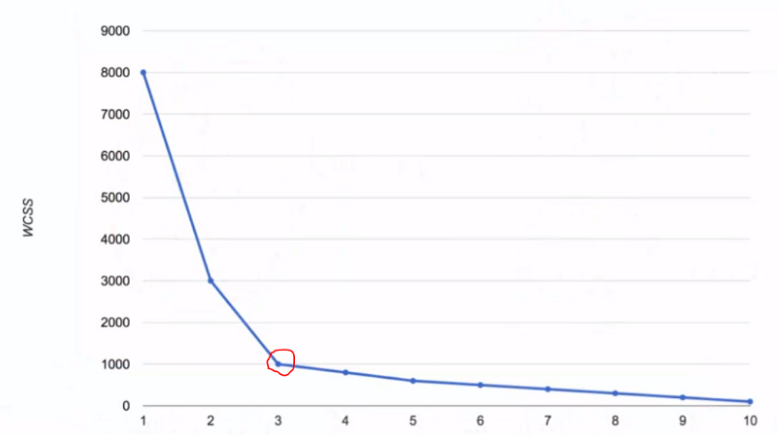

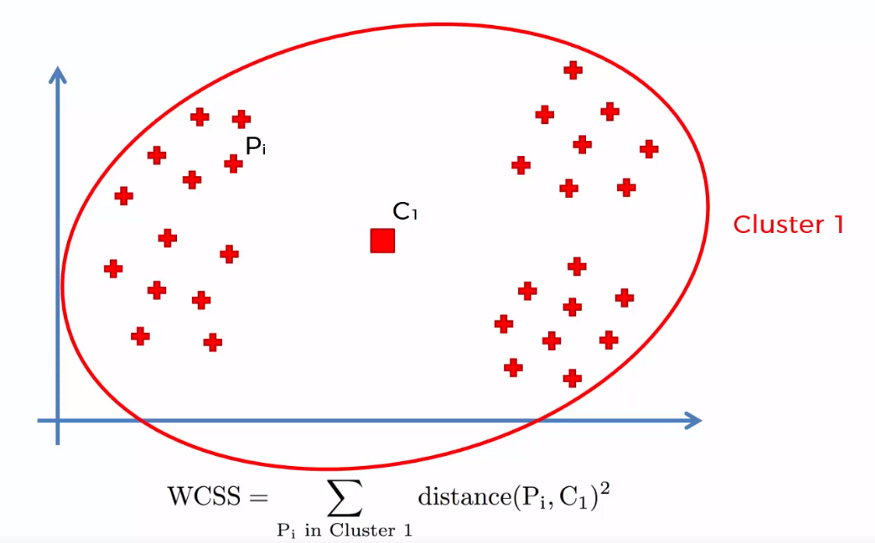

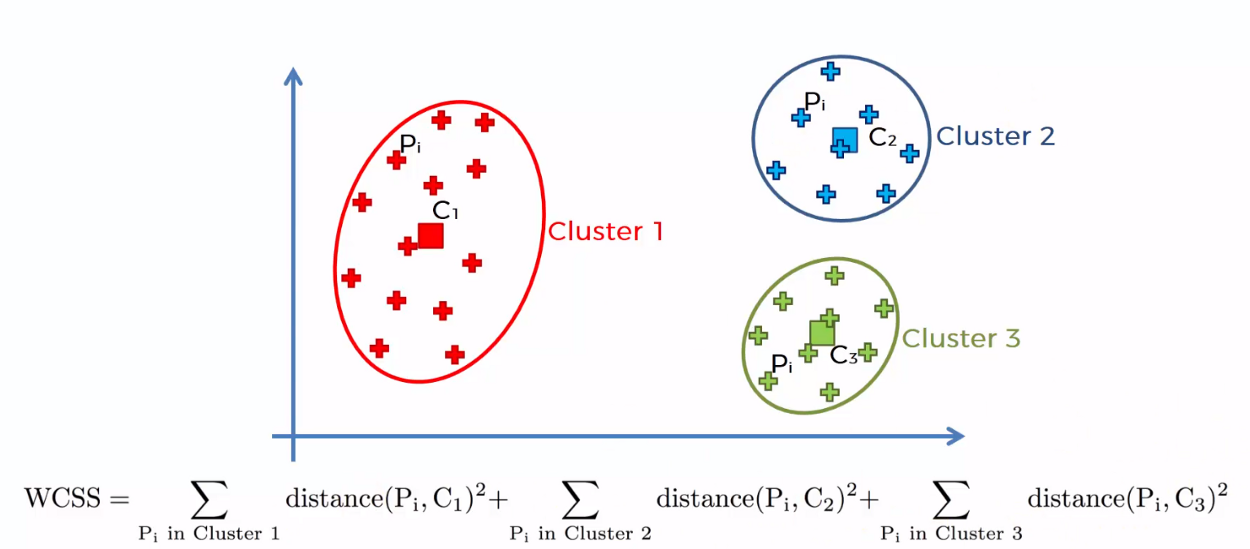

## Example

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import cufflinks
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans #Importamos k medias
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,MinMaxScaler
cufflinks.go_offline()

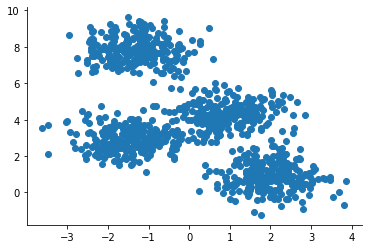

In [2]:
"""Creamos al data set"""
X, y = make_blobs(n_samples=1000, centers=4, cluster_std=.7, random_state=0)
plt.scatter(X[:,0], X[:,1])
sns.despine()

In [3]:
X

array([[-2.13010692,  7.85549437],
       [ 0.61951355,  3.99713532],
       [-2.43291508,  8.34600246],
       ...,
       [-1.16933922,  8.2955474 ],
       [-1.2350103 ,  7.77803611],
       [ 3.34998139,  0.747747  ]])

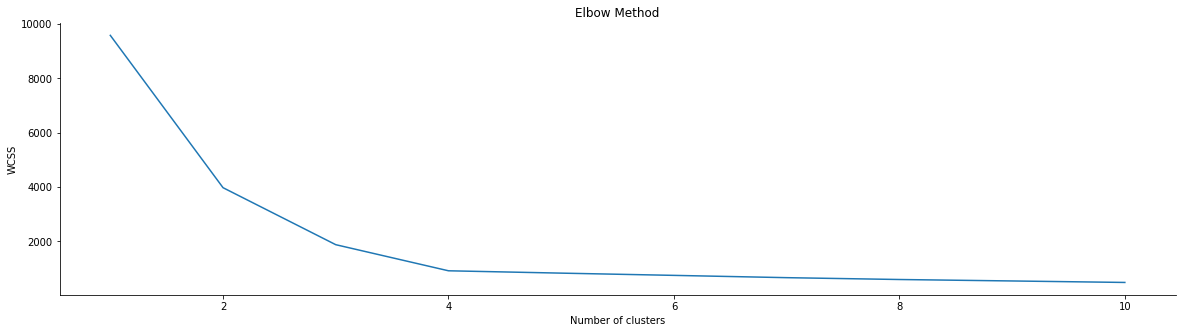

In [4]:
#Calculamos el wcss o la inercia
wcss = []
for i in range(1, 11): #Rango de numero de clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    """Intanciamos el init es k-means++ para que no afecte tanto el cambio
    de centroides, en max iter es el numero de veces"""
    kmeans.fit(X)
    wcss.append(kmeans.inertia_) #Guardamos la inercia
plt.subplots(figsize=(20,5))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
sns.despine()
plt.show()

In [5]:
current_palette = sns.color_palette()

/Users/jesusarredondo/Documents/Diplomado/Modulo3/mod3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



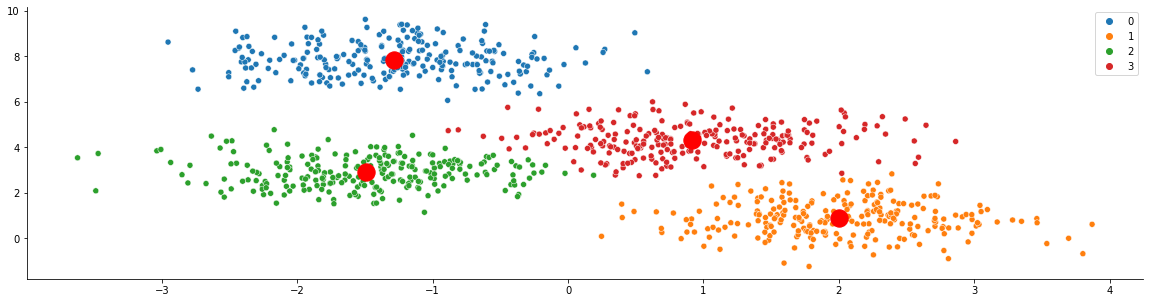

In [6]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)
plt.subplots(figsize=(20,5))
sns.scatterplot(X[:,0], X[:,1],hue=pred_y,palette=current_palette[:4])
sns.despine()
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
#Graficamos al centroide
plt.show()

## Example 2

In [7]:
import os
path = os.getcwd()[:-38]+"Data/vgsales.csv"
path

'/Users/jesusarredondo/Documents/Diplomado/Modulo3/Data/vgsales.csv'

In [8]:
data = pd.read_csv(path) #Venta de videojuegos

In [9]:
data.head() #Con las categoricas vamos a perfilar

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [10]:
data.drop(columns="Rank",inplace=True)

In [11]:
#Vamos a usar las numericas
variables=['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']

In [12]:
X = data[variables]

In [13]:
X.isnull().sum() #Datos numeros

NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [14]:
X.dropna(inplace=True)

In [15]:
#Escalamos los datos
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
X_std = pd.DataFrame(X_std,columns=X.columns)

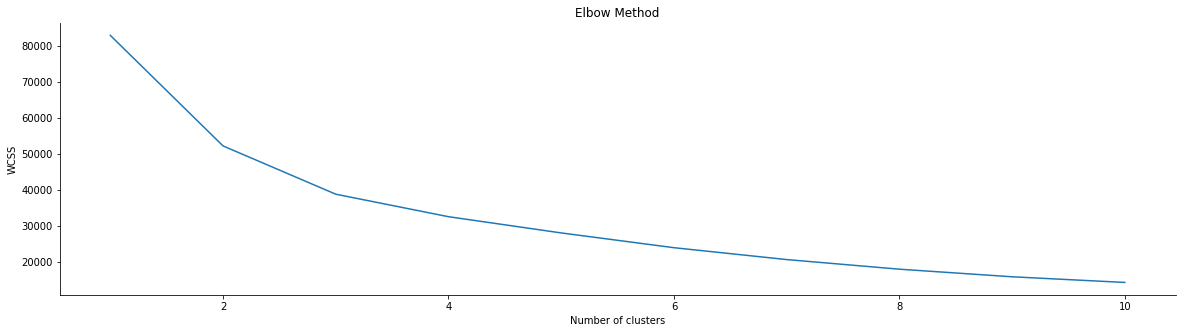

In [16]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_std)
    wcss.append(kmeans.inertia_)
plt.subplots(figsize=(20,5))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
sns.despine()
plt.show()

In [17]:
"""Bajamos las dimensiones a dos con pca (metodo de proyección)"""
n_components = 2
pca = PCA(n_components=n_components)
Xp = pd.DataFrame(pca.fit_transform(X_std),columns=[f"p_{i}" for i in  range(1,n_components+1)])
pca.explained_variance_ratio_.cumsum()

array([0.73537719, 0.88651324])

In [18]:
Xp

,p_1,p_2
0,101.129597,20.724851
1,41.755007,-14.549127
2,43.937052,1.958890
3,39.863367,2.016378
4,37.554354,-23.353698
...,...,...
16593,-0.649706,0.049040
16594,-0.649706,0.049040
16595,-0.655496,0.048148
16596,-0.646058,0.051593


/Users/jesusarredondo/Documents/Diplomado/Modulo3/mod3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/Users/jesusarredondo/Documents/Diplomado/Modulo3/mod3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but PCA was fitted with feature names



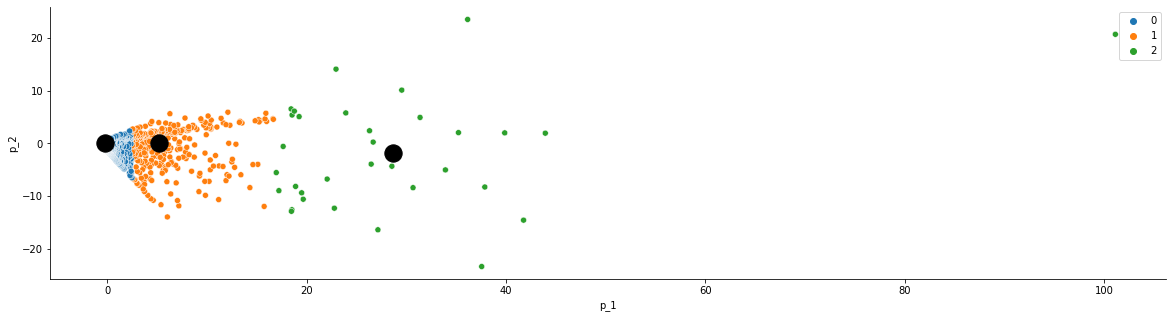

In [19]:
"""Con 3 cluster, se ve divison"""
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X_std) #Asigna datos al grupo que le corresponda
plt.subplots(figsize=(20,5))
sns.scatterplot(Xp["p_1"], Xp["p_2"],hue=pred_y,palette=current_palette[:3])
sns.despine()
centers = pca.transform(pd.DataFrame(kmeans.cluster_centers_))
plt.scatter(centers[:, 0], centers[:, 1], s=300, c='black')
plt.show()

In [20]:
data['cl']= X["cl"] = Xp["cl"] = X_std["cl"] = pred_y #Ponemos el clauster asiignas a todos los df

In [21]:
X

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,cl
0,41.49,29.02,3.77,8.46,82.74,2
1,29.08,3.58,6.81,0.77,40.24,2
2,15.85,12.88,3.79,3.31,35.82,2
3,15.75,11.01,3.28,2.96,33.00,2
4,11.27,8.89,10.22,1.00,31.37,2
...,...,...,...,...,...,...
16593,0.01,0.00,0.00,0.00,0.01,0
16594,0.01,0.00,0.00,0.00,0.01,0
16595,0.00,0.00,0.00,0.00,0.01,0
16596,0.00,0.01,0.00,0.00,0.01,0


In [22]:
X.groupby("cl").mean() #Agrupamos por cluster y sacamos la media

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
cl,,,,,
0,0.175540,0.087158,0.052698,0.028509,0.344197
1,2.138441,1.463154,0.591308,0.474498,4.667204
2,11.470588,6.548235,3.458235,2.255000,23.733235


In [23]:
X_std.groupby("cl").mean() #Datos escalados, checar perfilamiento

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
cl,,,,,
0,-0.109136,-0.117732,-0.081102,-0.103691,-0.124274
1,2.294440,2.605201,1.660387,2.261263,2.655829
2,13.721674,12.667974,10.930028,11.702753,14.917091


In [24]:
data.shape

(16598, 11)

In [25]:
X.shape

(16598, 6)

In [26]:
data[data['cl']==1]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,cl
29,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,Activision,9.03,4.28,0.13,1.32,14.76,1
31,Call of Duty: Black Ops,X360,2010.0,Shooter,Activision,9.67,3.73,0.11,1.13,14.64,1
35,Call of Duty: Black Ops II,X360,2012.0,Shooter,Activision,8.25,4.30,0.07,1.12,13.73,1
36,Call of Duty: Modern Warfare 2,X360,2009.0,Shooter,Activision,8.52,3.63,0.08,1.29,13.51,1
37,Call of Duty: Modern Warfare 3,PS3,2011.0,Shooter,Activision,5.54,5.82,0.49,1.62,13.46,1
...,...,...,...,...,...,...,...,...,...,...,...
1035,Call of Duty: World at War Final Fronts,PS2,2008.0,Shooter,Activision,0.61,0.18,0.00,0.94,1.72,1
1050,FIFA Soccer 10,PS2,2009.0,Sports,Electronic Arts,0.23,0.24,0.00,1.23,1.70,1
1180,Pro Evolution Soccer 2010,PS2,2009.0,Sports,Konami Digital Entertainment,0.10,0.18,0.12,1.16,1.57,1
1249,The Simpsons Game,PS2,2007.0,Action,Electronic Arts,0.35,0.03,0.00,1.13,1.51,1


In [27]:
data[data['cl']==0]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,cl
443,Star Wars Episode I Racer,N64,1999.0,Racing,Nintendo,2.31,0.62,0.14,0.04,3.12,0
468,NBA 2K13,X360,2012.0,Sports,Take-Two Interactive,2.60,0.21,0.01,0.19,3.00,0
484,Wave Race 64,N64,1996.0,Racing,Nintendo,1.98,0.58,0.34,0.04,2.94,0
485,SOCOM II: U.S. Navy SEALs,PS2,2003.0,Shooter,Sony Computer Entertainment,2.22,0.51,0.06,0.15,2.94,0
488,Pac-Man Collection,GBA,2001.0,Puzzle,Atari,2.07,0.77,0.05,0.05,2.94,0
...,...,...,...,...,...,...,...,...,...,...,...
16593,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01,0
16594,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01,0
16595,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01,0
16596,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01,0


Ya segmentado podemos tomar mejores decisiones

In [28]:
data["cl"].value_counts(dropna=False)

0    16006
1      558
2       34
Name: cl, dtype: int64